In [2]:
import numpy as np # linear algebra
import pandas as pd 

In [3]:
df1 = pd.read_csv("new.csv", encoding="gbk")

D:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1,11,12,14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
#剔除无用属性
df2 = df1.copy()
df2 = df2.drop(columns=['id','url','Cid','price'])

In [5]:
#剔除离群值
df3 = df2.copy()

upper_limit = df3['totalPrice'].mean() + 3*df3['totalPrice'].std()
lower_limit = df3['totalPrice'].mean() - 3*df3['totalPrice'].std()

df3 = df3[df3['totalPrice'] <= upper_limit]
df3 = df3[df3['totalPrice'] >= lower_limit]

print(df2.shape)
print(df3.shape)

(318851, 22)
(313599, 22)


In [6]:
#交易时间
df4 = df3.copy()

def tradeTimeMod(x):
    return x[0:4]

df4['tradeTime'] = df4['tradeTime'].apply(tradeTimeMod)

df4.head()

,Lng,Lat,tradeTime,DOM,followers,totalPrice,square,livingRoom,drawingRoom,kitchen,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,116.475489,40.019520,2016,1464.0,106,415.0,131.00,2,1,1,...,1.0,2005,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,116.453917,39.881534,2016,903.0,126,575.0,132.38,2,2,1,...,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,116.561978,39.877145,2016,1271.0,48,1030.0,198.00,3,2,1,...,4.0,2005,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,116.438010,40.076114,2016,965.0,138,297.5,134.00,3,1,1,...,1.0,2008,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,116.428392,39.886229,2016,927.0,286,392.0,81.00,2,1,1,...,4.0,1960,2,2,0.333,0.0,1.0,1.0,1,62588.0


In [7]:
#格式修正
df5 = df4.copy()
 
df5['tradeTime'] = pd.to_numeric(df5['tradeTime'])
df5['livingRoom'] = df5['livingRoom'].apply(pd.to_numeric, errors='coerce')
df5['drawingRoom'] = df5['drawingRoom'].apply(pd.to_numeric, errors='coerce')
df5['bathRoom'] = df5['bathRoom'].apply(pd.to_numeric, errors='coerce')
df5['constructionTime'] = df5['constructionTime'].apply(pd.to_numeric, errors='coerce')

In [8]:
df6  = df5.copy()

def floorType(x):
    return x.split(' ')[0]
def floorHeight(x):
    try:
        return int(x.split(' ')[1])
    except:
        return np.nan
    
df6['floorType'] = df6['floor'].apply(floorType)
df6['floorHeight'] = df6['floor'].apply(floorHeight)

df6 = df6.drop(columns=['floor'])

In [9]:
#编码
df7 = df6.copy()

df7 = df7[df7['buildingType']>=1]

cols_to_get_dummies = ['buildingType','renovationCondition','buildingStructure','elevator','district','floorType']
df7 = pd.get_dummies(data=df7, columns=cols_to_get_dummies)

In [10]:
df8 = df7.copy()

df8 = df8.dropna()

print(df8.shape)
print(df1.shape)

(148317, 52)
(318851, 26)


In [11]:
X = df8.drop(columns=['totalPrice'])
y = df8['totalPrice']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=50)

In [13]:
cols_to_norm = ['Lng','Lat','DOM','followers','square','livingRoom','drawingRoom','kitchen','bathRoom',
                'ladderRatio','fiveYearsProperty','subway','communityAverage','floorHeight']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train[cols_to_norm] = scaler.fit_transform(X_train[cols_to_norm])
X_test[cols_to_norm] = scaler.transform(X_test[cols_to_norm])

X_train.head()

D:\anaconda\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
D:\anaconda\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,Lng,Lat,tradeTime,DOM,followers,square,livingRoom,drawingRoom,kitchen,bathRoom,...,district_10,district_11,district_12,district_13,floorType_中,floorType_低,floorType_底,floorType_未知,floorType_顶,floorType_高
293857,0.974220,0.401937,2016,0.000000,0.002625,0.179897,0.285714,0.2,0.333333,0.166667,...,0,1,0,0,0,0,0,0,0,1
163771,0.601392,0.472931,2015,0.000000,0.003500,0.139797,0.428571,0.2,0.333333,0.166667,...,0,0,0,0,0,0,0,0,1,0
34057,0.624326,0.438230,2016,0.011933,0.016623,0.060547,0.142857,0.0,0.333333,0.166667,...,0,0,0,0,0,1,0,0,0,0
10642,0.582401,0.362069,2016,0.045346,0.024497,0.238876,0.428571,0.4,0.333333,0.166667,...,0,0,0,0,0,0,0,0,0,1
266787,0.343601,0.483197,2016,0.000000,0.000875,0.130126,0.285714,0.2,0.333333,0.166667,...,0,0,0,0,0,1,0,0,0,0


In [14]:
from sklearn.ensemble import RandomForestRegressor

rfg_model = RandomForestRegressor()
rfg_model.fit(X_train, y_train)

print(rfg_model.score(X_train, y_train))
print(rfg_model.score(X_test, y_test))

0.9892119232042148
0.9240163132296207


In [15]:
#特征重要性
from sklearn.ensemble import ExtraTreesClassifier

importances = rfg_model.feature_importances_

In [16]:
print("model.feature_importances_: {}".format(importances))

model.feature_importances_: [8.03302508e-03 8.41029805e-03 7.67066897e-02 1.79323094e-01
 8.46903580e-03 3.72215069e-01 1.92879642e-03 1.32056203e-03
 3.07713516e-04 1.10705784e-03 7.05480097e-03 4.65535127e-03
 1.25085825e-03 8.91074766e-04 3.08277937e-01 4.75128463e-03
 5.46471273e-04 2.92260187e-06 6.64210035e-04 5.12937320e-04
 1.01883446e-03 2.21958629e-04 8.16429169e-04 1.09845713e-03
 2.34432296e-07 6.06893430e-04 8.27364110e-06 3.37530395e-04
 1.15330983e-05 5.14495620e-04 4.16529049e-04 4.11937297e-04
 2.97553381e-04 3.11737225e-04 1.06927479e-04 1.36954211e-04
 3.36471254e-05 3.96813083e-04 7.33617358e-04 3.59943573e-04
 1.05778298e-04 4.13127594e-04 1.62223446e-04 1.50189237e-05
 1.00805513e-04 1.11082703e-03 9.03411341e-04 9.03166478e-04
 5.09798913e-05 9.98211141e-04 9.66961060e-04]


In [17]:
indices = np.argsort(importances)[::-1]
print(indices)

[ 5 14  3  2  4  1  0 10 15 11  6  7 12 45  9 23 20 49 50 46 47 13 22 38
 18 25 16 29 19 30 41 31 37 39 27 33  8 32 21 42 35 34 40 44 48 36 43 28
 26 17 24]


In [18]:
#feature list
name = X.columns

In [19]:
indices = np.argsort(importances)[::-1]

In [20]:
names = [name[i] for i in indices]

D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 20013 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 39030 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 39640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 20302 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 24213 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 26410 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-package

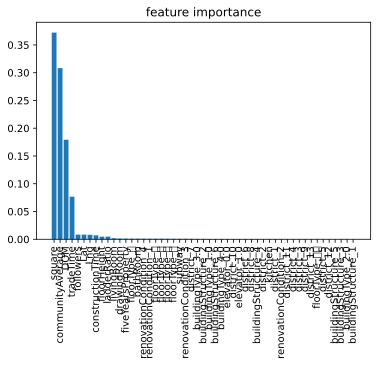

In [23]:
plt.figure()
plt.title("feature importance")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.savefig("result")
plt.show()

In [22]:
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
